# Pisa Data Exploration

## Exploratory Wrangling

This document explores a pisa dataset containing 2012 survey taken part in by around 510,000 students in 65 economies.

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
df_original = pd.read_csv('pisa2012.csv', encoding="cp1252")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = df_original[['CNT','SUBNATIO','STRATUM','OECD','SCHOOLID','ST01Q01','ST02Q01','ST03Q02','ST04Q01','ST13Q01','ST15Q01','ST17Q01','ST19Q01','ST20Q01','ST28Q01','IC01Q04','IC02Q04','AGE','LMINS','MMINS','SMINS','TIMEINT','WEALTH','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']]


#### Calculating averge plausible values for each subjects, Math, Reading and Science.

In [7]:
df['Math'] = (df['PV1MATH'] + df['PV2MATH'] +df['PV3MATH'] +df['PV4MATH'] +df['PV5MATH']) / 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df['Reading'] = (df['PV1READ'] + df['PV2READ'] +df['PV3READ'] +df['PV4READ'] +df['PV5READ']) / 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['Science'] = (df['PV1SCIE'] + df['PV2SCIE'] +df['PV3SCIE'] +df['PV4SCIE'] +df['PV5SCIE']) / 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 41 columns):
CNT         485490 non-null object
SUBNATIO    485490 non-null int64
STRATUM     485490 non-null object
OECD        485490 non-null object
SCHOOLID    485490 non-null int64
ST01Q01     485490 non-null int64
ST02Q01     485438 non-null float64
ST03Q02     485490 non-null int64
ST04Q01     485490 non-null object
ST13Q01     457979 non-null object
ST15Q01     467751 non-null object
ST17Q01     443261 non-null object
ST19Q01     451410 non-null object
ST20Q01     476363 non-null object
ST28Q01     473765 non-null object
IC01Q04     297305 non-null object
IC02Q04     296944 non-null object
AGE         485374 non-null float64
LMINS       282866 non-null float64
MMINS       283303 non-null float64
SMINS       270914 non-null float64
TIMEINT     297074 non-null float64
WEALTH      479597 non-null float64
PV1MATH     485490 non-null float64
PV2MATH     485490 non-null float64
PV3MATH  

In [11]:
df.describe()

,SUBNATIO,SCHOOLID,ST01Q01,ST02Q01,ST03Q02,AGE,LMINS,MMINS,SMINS,TIMEINT,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Math,Reading,Science
count,4.854900e+05,485490.000000,485490.000000,485438.000000,485490.000000,485374.000000,282866.000000,283303.000000,270914.000000,297074.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000,485490.000000,485490.000000,485490.000000
mean,4.315457e+06,240.152197,9.813323,2.579260,1996.070061,15.784283,219.276636,226.007056,211.122460,50.895996,...,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184,469.651234,472.006964,475.808094
std,2.524434e+06,278.563016,3.734726,2.694013,0.255250,0.290221,97.997730,97.448421,131.368322,40.987895,...,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347,100.786610,98.863310,97.998470
min,8.000000e+04,1.000000,7.000000,1.000000,1996.000000,15.170000,0.000000,0.000000,0.000000,0.000000,...,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600,54.767080,6.445400,25.158540
25%,2.030000e+06,61.000000,9.000000,1.000000,1996.000000,15.580000,165.000000,180.000000,120.000000,19.000000,...,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300,396.019620,405.044200,405.762800
50%,4.100000e+06,136.000000,10.000000,1.000000,1996.000000,15.750000,200.000000,220.000000,180.000000,39.000000,...,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900,465.734520,475.477980,475.512860
75%,6.880000e+06,291.000000,10.000000,3.000000,1996.000000,16.000000,250.000000,250.000000,270.000000,71.000000,...,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700,540.123060,542.831195,546.381920
max,8.580000e+06,1471.000000,96.000000,25.000000,1997.000000,16.330000,2400.000000,3000.000000,2975.000000,206.000000,...,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600,903.107960,849.359740,857.832900


In [12]:
df['OECD'].value_counts()

OECD        295416
Non-OECD    190074
Name: OECD, dtype: int64

### What is the structure of your dataset?
I've extracted some columns including following from the original dataset of pisa survey.
- Country of student as "CNT",  Plausible values as starting with "PV", wealth indicator as "WEALTH", language learning minutes per day as "LMINS", math learning minutes per day as "MMINS" and science learning minutes per day as "SMINS", students gender as "ST04Q01", mother's and father's highest schooling as "ST13Q01" and "ST17Q01".

Plausible values are numeric value to estimate student's score. There are five plausible values for each subjects. For the purpose of data analytic conveninence, I've added the average value of plausble values for each subjects as "math", "Reading" and "Science".


### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out what features have strong relationship with student's score.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Wealth, father's and mother's education and learning minutes has strong correlation with student's score. There might be also some relationship between country group or student's gender and student's score.

Text(0.5, 1.0, 'Science Score Distribution')

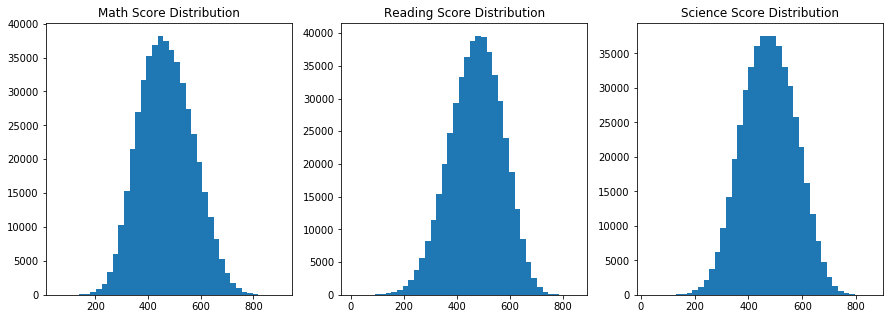

In [13]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.hist(data=df, x= 'Math', bins = 40)
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
plt.hist(data=df, x= 'Reading', bins = 40)
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
plt.hist(data=df, x= 'Science', bins = 40)
plt.title('Science Score Distribution')

In [14]:
df['ST17Q01'].value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: ST17Q01, dtype: int64

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 5.6000e+01, 0.0000e+00,
        0.0000e+00, 1.2500e+02, 1.2300e+02, 5.5800e+02, 1.7700e+02,
        8.6000e+01, 9.0000e+01, 1.7000e+02, 1.3000e+02, 6.1600e+02,
        1.0250e+03, 5.4400e+02, 5.3900e+02, 1.0990e+03, 1.8760e+03,
        7.0000e+02, 2.7240e+03, 2.5790e+03, 2.8190e+03, 4.5610e+03,
        4.2760e+03, 5.6870e+03, 8.4160e+03, 7.3620e+03, 9.2280e+03,
        1.3523e+04, 1.3608e+04, 1.6316e+04, 2.0421e+04, 2.4049e+04,
        2.2835e+04, 3.0352e+04, 2.7678e+04, 2.8108e+04, 3.4788e+04,
        2.0917e+04, 3.1566e+04, 2.6213e+04, 2.2947e+04, 1.3402e+04,
        2.1533e+04, 6.3000e+03, 1.3604e+04, 9.1890e+03, 2.7250e+03,
        1.7230e+03, 9.3070e+03, 4.4350e+03, 1.5500e+02, 4.7000e+01,
        2.4000e+01, 4.2000e+01, 2.7590e+03, 3.8920e+03, 1.5720e+03]),
 array([-6.65 , -6.485, -6.32 , -6.155, -5.99 , -5.825, -5.66 , -5.495,
        -5.33 , -5.165, -5.   , -4.835, -4.67 , -4.505, -4.34 , -4.175,
        -4.01 , -3.845, -3.68 , -3.515

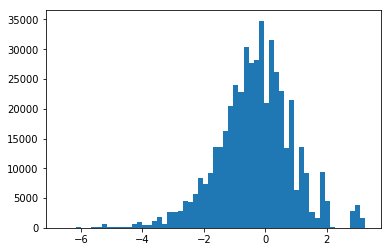

In [15]:
plt.hist(data=df, x= 'WEALTH', bins = 60)
plt.title('Wealth Distribution')

##### I've confirmed that there are linear relationship among Math, Reading and Science.

Text(0, 0.5, 'Math Score')

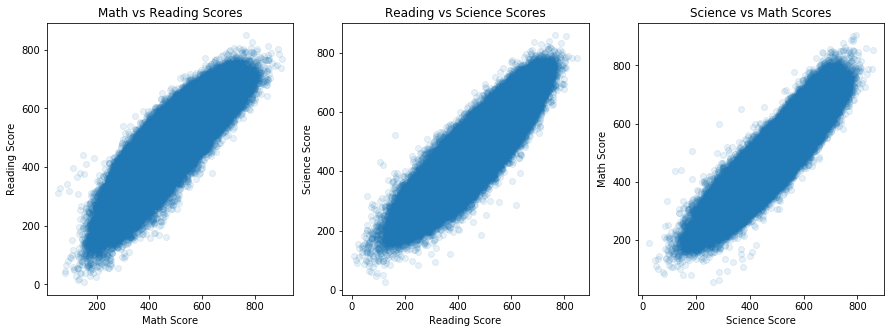

In [16]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=df, x='Math', y='Reading', alpha = 0.1)
plt.title('Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.subplot(1, 3, 2)
plt.scatter(data=df, x='Reading', y='Science', alpha = 0.1)
plt.title('Reading vs Science Scores')
plt.xlabel('Reading Score')
plt.ylabel('Science Score')

plt.subplot(1, 3, 3)
plt.scatter(data=df, x='Science', y='Math', alpha = 0.1)
plt.title('Science vs Math Scores')
plt.xlabel('Science Score')
plt.ylabel('Math Score')

In [17]:
df.corr()

,SUBNATIO,SCHOOLID,ST01Q01,ST02Q01,ST03Q02,AGE,LMINS,MMINS,SMINS,TIMEINT,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,Math,Reading,Science
SUBNATIO,1.000000,-0.068410,0.032002,-0.005214,0.091415,-0.013696,-0.079314,-0.033111,0.021936,-0.009979,...,-0.012100,-0.011718,-0.007279,-0.007027,-0.007406,-0.007776,-0.007067,-0.004092,-0.012405,-0.007573
SCHOOLID,-0.068410,1.000000,0.000550,0.034750,-0.073137,-0.003227,0.118400,0.085085,0.008192,-0.066309,...,-0.031798,-0.032287,-0.045609,-0.045102,-0.044919,-0.046000,-0.045866,-0.051248,-0.033100,-0.047130
ST01Q01,0.032002,0.000550,1.000000,0.062690,0.013043,0.040796,0.010954,0.021558,0.036977,0.013604,...,0.001328,0.000469,0.000647,0.001183,0.001030,0.001040,0.000558,0.000568,0.001033,0.000924
ST02Q01,-0.005214,0.034750,0.062690,1.000000,-0.086278,0.048800,-0.068786,-0.071434,-0.053622,-0.035321,...,-0.004669,-0.004558,-0.020050,-0.019369,-0.020048,-0.019908,-0.018984,0.016292,-0.005130,-0.020377
ST03Q02,0.091415,-0.073137,0.013043,-0.086278,1.000000,-0.300133,0.035364,0.050814,0.066731,0.020757,...,-0.000174,-0.000486,0.002254,0.002523,0.002529,0.002750,0.002195,-0.021998,-0.000473,0.002538
AGE,-0.013696,-0.003227,0.040796,0.048800,-0.300133,1.000000,-0.013589,-0.005136,-0.001823,0.017283,...,0.018229,0.018225,0.018460,0.018664,0.018709,0.018036,0.018382,0.020212,0.019070,0.019111
LMINS,-0.079314,0.118400,0.010954,-0.068786,0.035364,-0.013589,1.000000,0.637872,0.283099,-0.012587,...,0.029586,0.029066,0.017762,0.016928,0.016202,0.017792,0.016987,0.020345,0.030070,0.017784
MMINS,-0.033111,0.085085,0.021558,-0.071434,0.050814,-0.005136,0.637872,1.000000,0.416763,-0.018257,...,0.061580,0.061254,0.054507,0.053646,0.053543,0.053933,0.054000,0.071186,0.063558,0.055973
SMINS,0.021936,0.008192,0.036977,-0.053622,0.066731,-0.001823,0.283099,0.416763,1.000000,-0.012290,...,0.134562,0.133644,0.143548,0.144277,0.144236,0.144693,0.144652,0.155308,0.138858,0.149732
TIMEINT,-0.009979,-0.066309,0.013604,-0.035321,0.020757,0.017283,-0.012587,-0.018257,-0.012290,1.000000,...,-0.051639,-0.050275,-0.043665,-0.042932,-0.042192,-0.042671,-0.041960,-0.052285,-0.053117,-0.044304


##### It is difficult to see clear relationship between wealth and scores from the scatter plot as below.

Text(0, 0.5, 'Wealth')

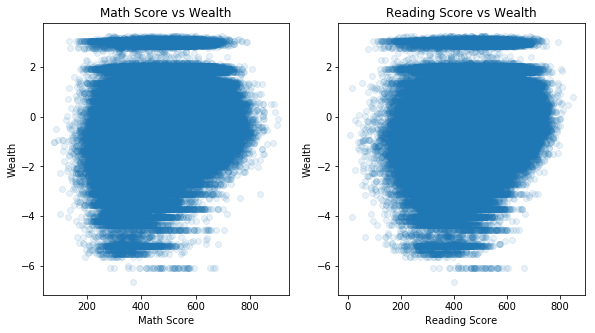

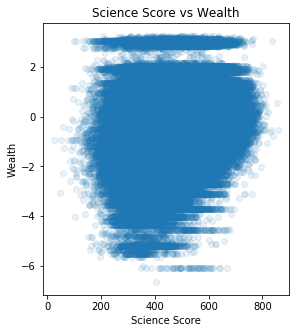

In [18]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=df, x='Math', y='WEALTH', alpha = 0.1)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
plt.scatter(data=df, x='Reading', y='WEALTH', alpha = 0.1)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score')
plt.ylabel('Wealth')

plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 3)
plt.scatter(data=df, x='Science', y='WEALTH', alpha = 0.1)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score')
plt.ylabel('Wealth')

##### It is also difficult to see clear relationship between learning minutes and scores from the scatter plot as below.

Text(0, 0.5, 'Learning Minutes')

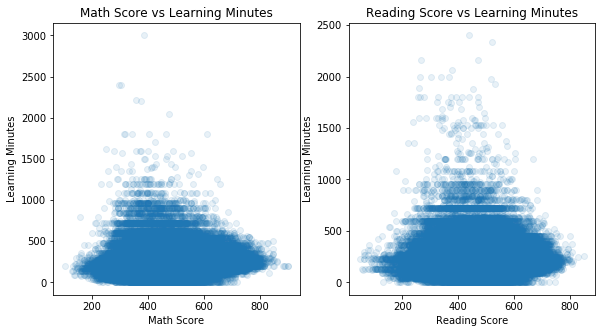

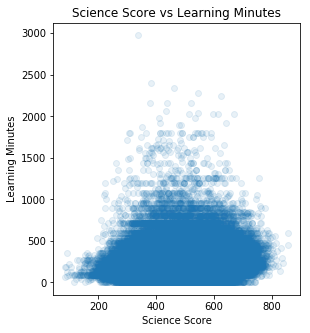

In [42]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=df, x='Math', y='MMINS', alpha = 0.1)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
plt.scatter(data=df, x='Reading', y='LMINS', alpha = 0.1)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score')
plt.ylabel('Learning Minutes')

plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 3)
plt.scatter(data=df, x='Science', y='SMINS', alpha = 0.1)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score')
plt.ylabel('Learning Minutes')

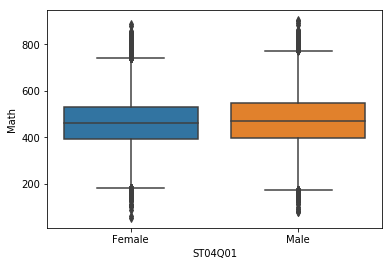

In [19]:
sb.boxplot(data=df, x= 'ST04Q01', y='Math')
plt.title('Math Score Boxplot (Female and Male)')

There are some clear relation between scores and student's parent education. Parent, whichever mother or father, has higher school exeperience, student has higher scores for all subjects.

[Text(0, 0, '<ISCED level 3A> '),
 Text(0, 0, '<ISCED level 3B, 3C> '),
 Text(0, 0, '<ISCED level 2> '),
 Text(0, 0, '<ISCED level 1> '),
 Text(0, 0, 'He did not complete <ISCED level 1> ')]

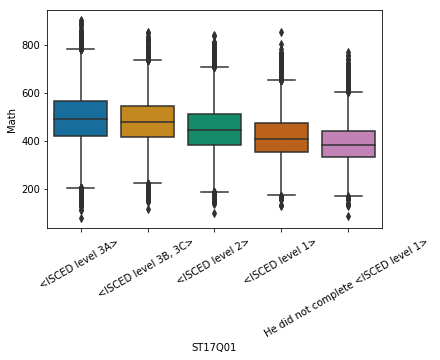

In [20]:
group_means = df.groupby(['ST17Q01']).mean()
group_order = group_means.sort_values(['Math'], ascending = False).index

ax = sb.boxplot(data=df, x= 'ST17Q01', y='Math', palette='colorblind', order=group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Father education level and students score')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0, '<ISCED level 3A> '),
 Text(0, 0, '<ISCED level 3B, 3C> '),
 Text(0, 0, '<ISCED level 2> '),
 Text(0, 0, '<ISCED level 1> '),
 Text(0, 0, 'He did not complete <ISCED level 1> ')]

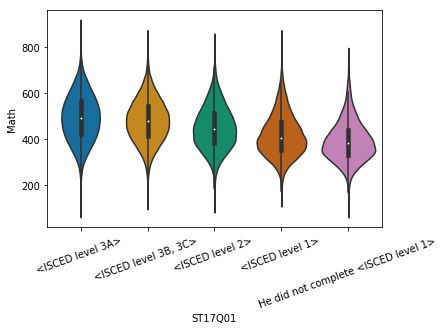

In [21]:
ax = sb.violinplot(data=df, x= 'ST17Q01', y='Math', palette='colorblind', order = group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.title('Father education level and students score')

ISCED Level

Text(0.5, 1.0, 'Mother education level and students score')

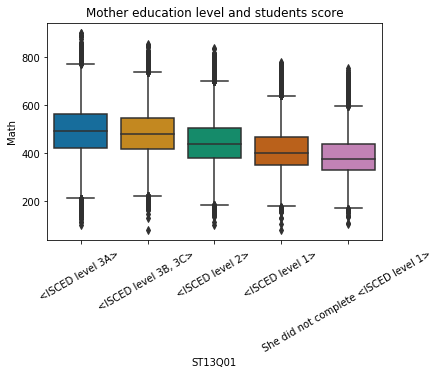

In [70]:
group_means = df.groupby(['ST13Q01']).mean()
group_order = group_means.sort_values(['Math'], ascending = False).index
ax = sb.boxplot(data=df, x= 'ST13Q01', y='Math', palette='colorblind', order=group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Mother education level and students score')

Text(0.5, 1.0, 'Mother education level and students score')

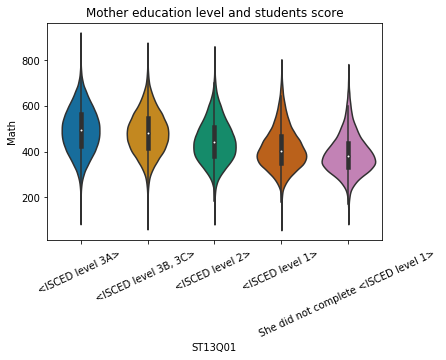

In [71]:
ax = sb.violinplot(data=df, x= 'ST13Q01', y='Math', palette='colorblind', order = group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.title('Mother education level and students score')

When we see the average score by country, there are some clear tendency with other attributes.

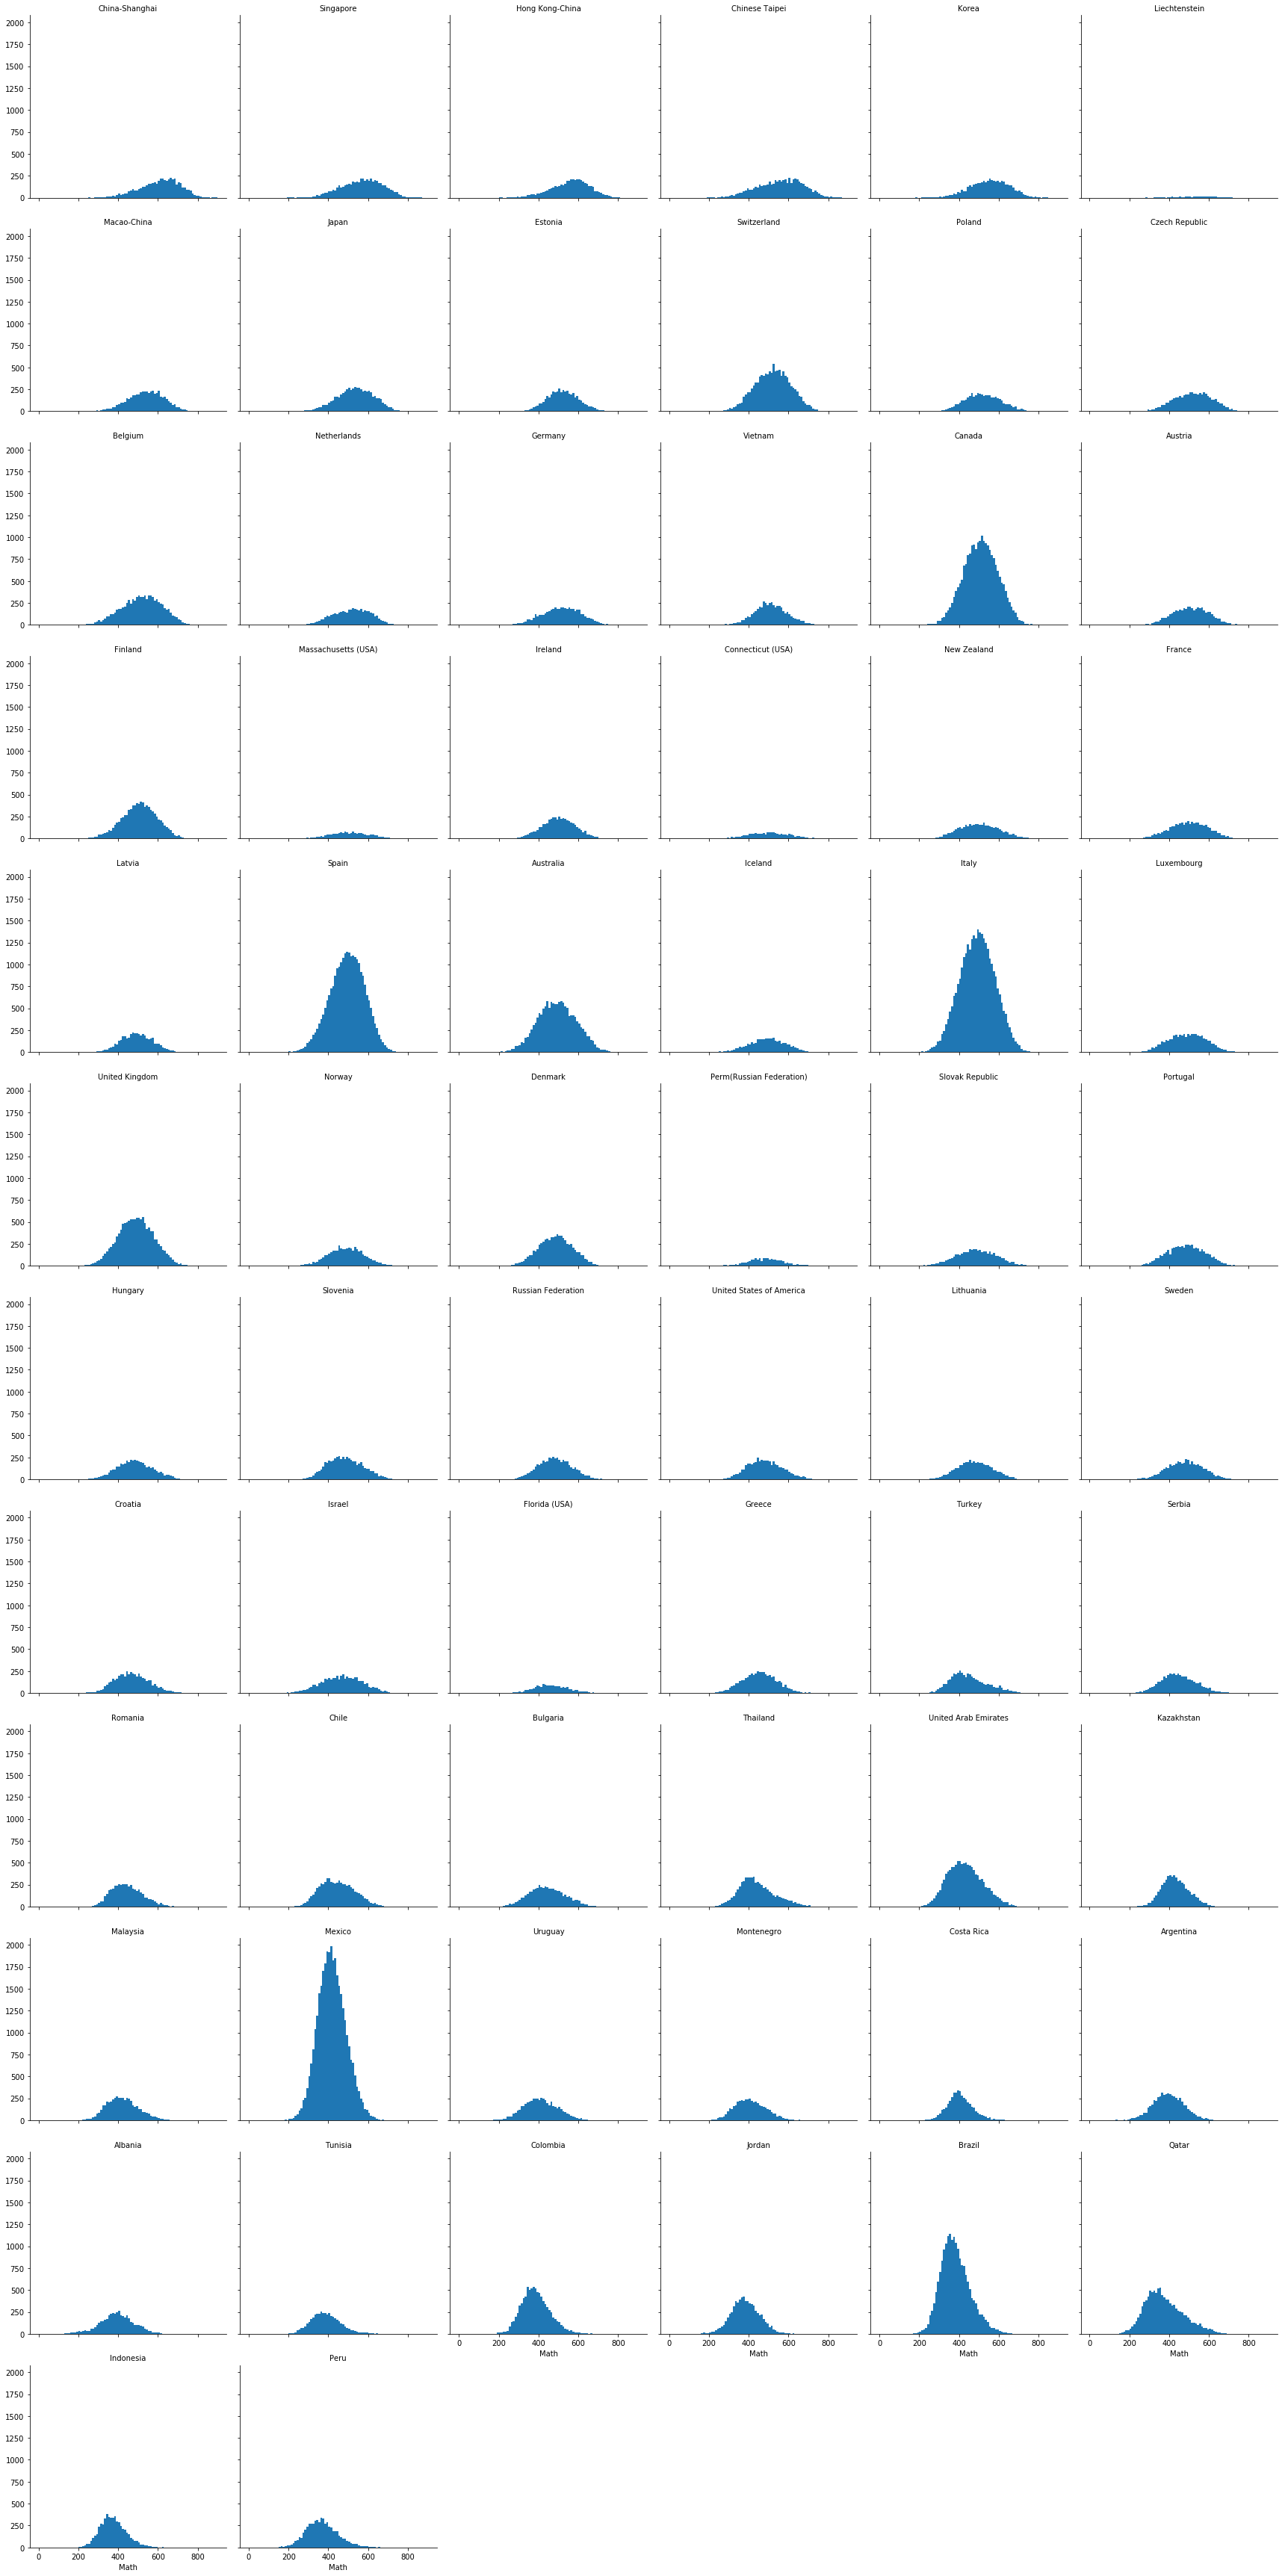

In [24]:
group_means = df.groupby(['CNT']).mean()
group_order = group_means.sort_values(['Math'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'CNT',col_wrap = 6, height = 4,
                 col_order = group_order)
g.map(plt.hist, 'Math', bins = np.arange(0, df['Math'].max()+1, 10))
g.set_titles('{col_name}')

In [25]:
group_order

Index(['China-Shanghai', 'Singapore', 'Hong Kong-China', 'Chinese Taipei',
       'Korea', 'Liechtenstein', 'Macao-China', 'Japan', 'Estonia',
       'Switzerland', 'Poland', 'Czech Republic', 'Belgium', 'Netherlands',
       'Germany', 'Vietnam', 'Canada', 'Austria', 'Finland',
       'Massachusetts (USA)', 'Ireland', 'Connecticut (USA)', 'New Zealand',
       'France', 'Latvia', 'Spain', 'Australia', 'Iceland', 'Italy',
       'Luxembourg', 'United Kingdom', 'Norway', 'Denmark',
       'Perm(Russian Federation)', 'Slovak Republic', 'Portugal', 'Hungary',
       'Slovenia', 'Russian Federation', 'United States of America',
       'Lithuania', 'Sweden', 'Croatia', 'Israel', 'Florida (USA)', 'Greece',
       'Turkey', 'Serbia', 'Romania', 'Chile', 'Bulgaria', 'Thailand',
       'United Arab Emirates', 'Kazakhstan', 'Malaysia', 'Mexico', 'Uruguay',
       'Montenegro', 'Costa Rica', 'Argentina', 'Albania', 'Tunisia',
       'Colombia', 'Jordan', 'Brazil', 'Qatar', 'Indonesia', 'Peru'],
 

We can see moderate linear relationship between scores and Wealth average by country, but it is difficult to find clear relationship between scores and learning minutes average by country.

Text(0, 0.5, 'Wealth')

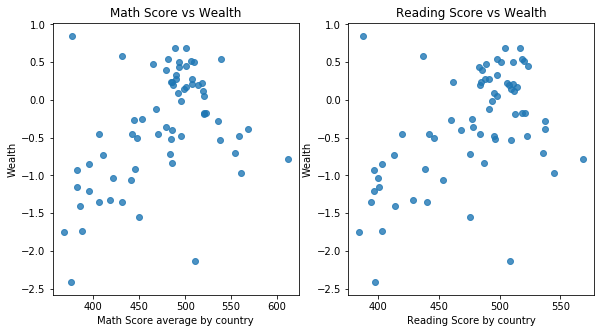

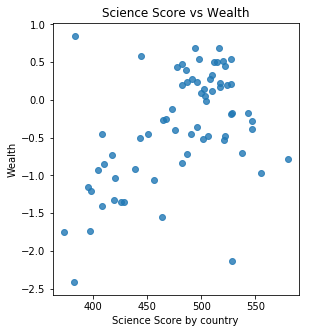

In [26]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=group_means, x='Math', y='WEALTH', alpha = 0.8)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
plt.scatter(data=group_means, x='Reading', y='WEALTH', alpha = 0.8)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score by country')
plt.ylabel('Wealth')

plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 3)
plt.scatter(data=group_means, x='Science', y='WEALTH', alpha = 0.8)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score by country')
plt.ylabel('Wealth')

Text(0, 0.5, 'Learning Minutes')

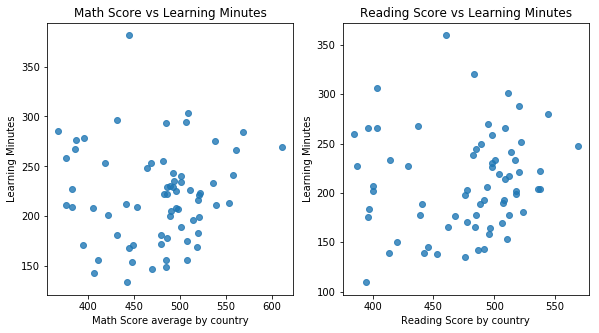

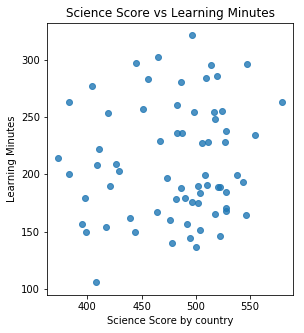

In [41]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 1)
plt.scatter(data=group_means, x='Math', y='MMINS', alpha = 0.8)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
plt.scatter(data=group_means, x='Reading', y='LMINS', alpha = 0.8)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score by country')
plt.ylabel('Learning Minutes')

plt.figure(figsize = [15, 5])
plt.subplot(1, 3, 3)
plt.scatter(data=group_means, x='Science', y='SMINS', alpha = 0.8)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score by country')
plt.ylabel('Learning Minutes')

In [27]:
df.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [28]:
CNT_CAT = [['Albania','Europe'], ['United Arab Emirates','Middle East'], ['Argentina','Latin America'], ['Australia','Oceania'],
       ['Austria','Europe'], ['Belgium','Europe'], ['Bulgaria','Europe'], ['Brazil','Latin America'], ['Canada','North America'],
       ['Switzerland','Europe'], ['Chile','Latin America'], ['Colombia','Latin America'], ['Costa Rica','Latin America'], ['Czech Republic','Europe'],
       ['Germany','Europe'], ['Denmark','Europe'], ['Spain','Europe'], ['Estonia','Europe'], ['Finland','Europe'], ['France','Europe'],
       ['United Kingdom','Europe'], ['Greece','Europe'], ['Hong Kong-China','Asia'], ['Croatia','Europe'],
       ['Hungary','Europe'], ['Indonesia','Asia'], ['Ireland','Europe'], ['Iceland','Europe'], ['Israel','Middle East'], ['Italy','Europe'],
       ['Jordan','Middle East'], ['Japan','Asia'], ['Kazakhstan','Asia'], ['Korea','Asia'], ['Liechtenstein','Europe'],
       ['Lithuania','Europe'], ['Luxembourg','Europe'], ['Latvia','Europe'], ['Macao-China','Asia'], ['Mexico','Latin America'],
       ['Montenegro','Europe'], ['Malaysia','Asia'], ['Netherlands','Europe'], ['Norway','Europe'], ['New Zealand','Oceania'],
       ['Peru','Latin America'], ['Poland','Europe'], ['Portugal','Europe'], ['Qatar','Middle East'], ['China-Shanghai','Asia'],
       ['Perm(Russian Federation)','Europe'], ['Florida (USA)','North America'], ['Connecticut (USA)','North America'],
       ['Massachusetts (USA)','North America'], ['Romania','Europe'], ['Russian Federation','Europe'],
       ['Singapore','Asia'], ['Serbia','Europe'], ['Slovak Republic','Europe'], ['Slovenia','Europe'], ['Sweden','Europe'],
       ['Chinese Taipei','Asia'], ['Thailand','Asia'], ['Tunisia','Africa'], ['Turkey','Asia'], ['Uruguay','Latin America'],
       ['United States of America','North America'], ['Vietnam','Asia']]

In [29]:
df_CNTCAT = pd.DataFrame(CNT_CAT)

In [30]:
df_CNTCAT = df_CNTCAT.rename(columns={0: 'CNT', 1: 'Region'})

In [31]:
df = pd.merge(df, df_CNTCAT, on='CNT')
group_means = pd.merge(group_means, df_CNTCAT, on='CNT')

Grouping the countries by region to find out if there could be reginal gap among the countries.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violinplot of score average by country')

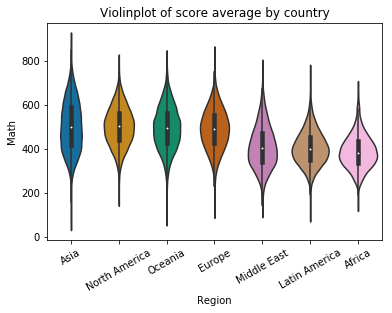

In [68]:
group_means_RE = df.groupby(['Region']).mean()
group_order = group_means_RE.sort_values(['Math'], ascending = False).index
ax = sb.violinplot(data=df, x= 'Region', y='Math', palette='colorblind', order = group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Violinplot of average score by country')

If I separate the scatter plot by average scores and Wealth, I've found more clear linear relationship.

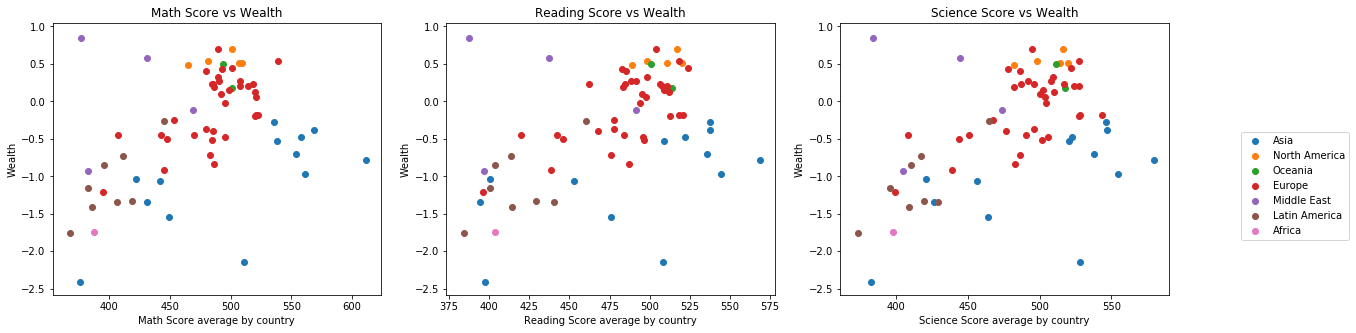

In [33]:
listre = ['Asia', 'North America', 'Oceania', 'Europe', 'Middle East', 'Latin America', 'Africa']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='WEALTH', label = i)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='WEALTH', label = i)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='WEALTH', label = i)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score average by country')
plt.ylabel('Wealth')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


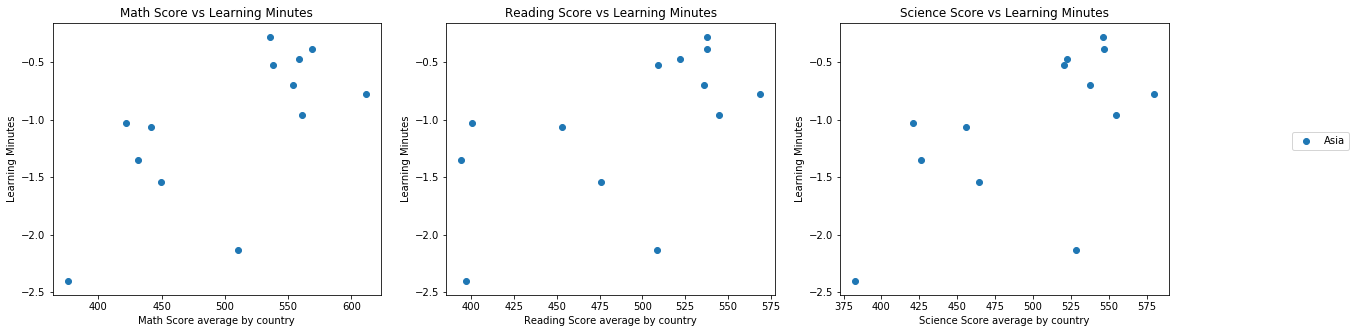

In [57]:
listre = ['Asia']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='WEALTH', label = i)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='WEALTH', label = i)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='WEALTH', label = i)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score average by country')
plt.ylabel('Learning Minutes')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


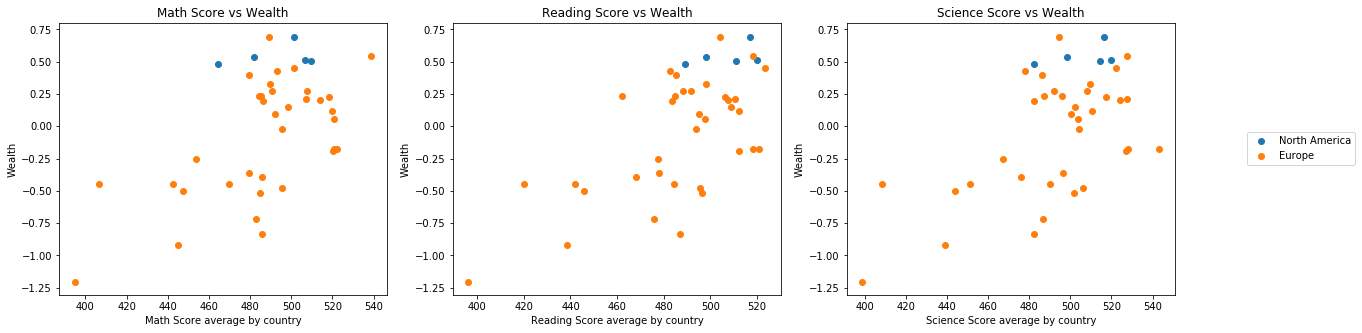

In [45]:
listre = ['North America','Europe']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='WEALTH', label = i)
plt.title('Math Score vs Wealth')
plt.xlabel('Math Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='WEALTH', label = i)
plt.title('Reading Score vs Wealth')
plt.xlabel('Reading Score average by country')
plt.ylabel('Wealth')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='WEALTH', label = i)
plt.title('Science Score vs Wealth')
plt.xlabel('Science Score average by country')
plt.ylabel('Wealth')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


In terms of the relation between average scores by country and learning minutes, there are still difficulties to find out clear tendancy even if we separete scatter plot by country region.

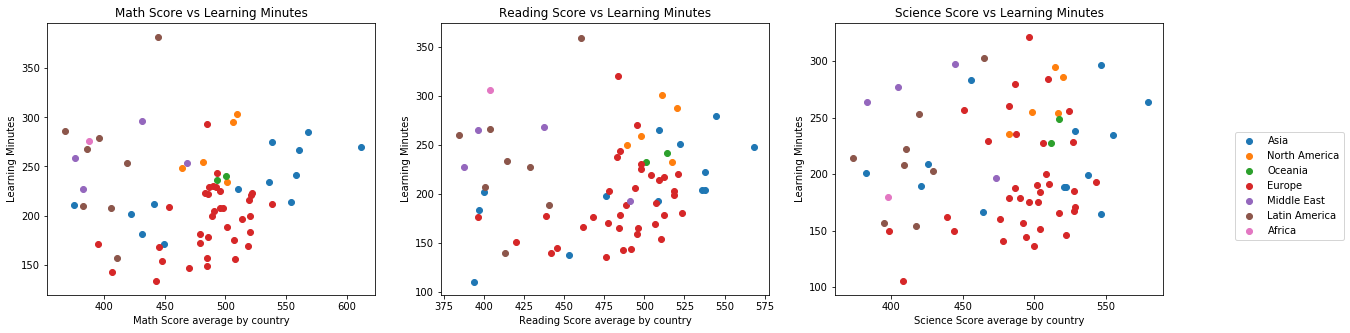

In [43]:
listre = ['Asia', 'North America', 'Oceania', 'Europe', 'Middle East', 'Latin America', 'Africa']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='MMINS', label = i)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='LMINS', label = i)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='SMINS', label = i)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score average by country')
plt.ylabel('Learning Minutes')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


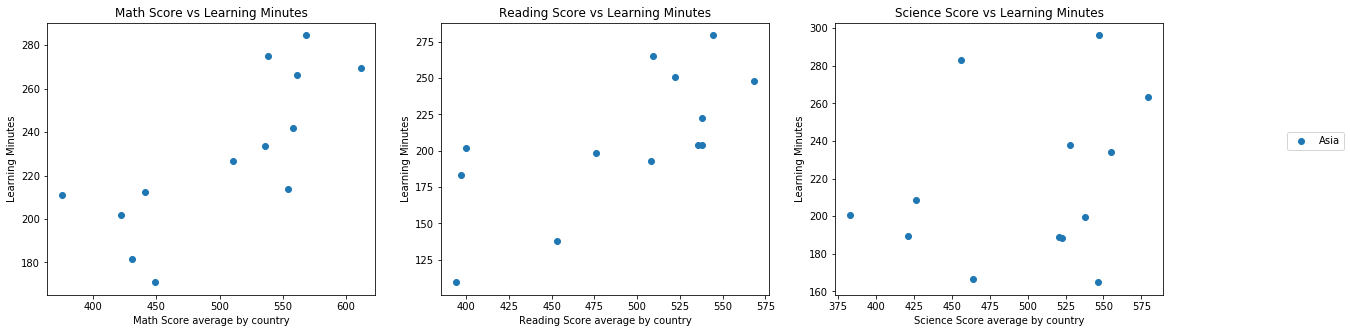

In [46]:
listre = ['Asia']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='MMINS', label = i)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='LMINS', label = i)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='SMINS', label = i)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score average by country')
plt.ylabel('Learning Minutes')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


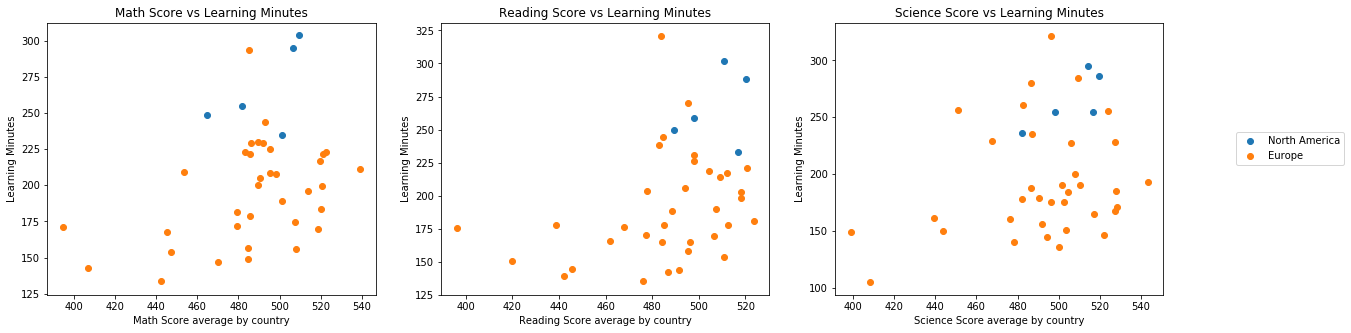

In [47]:
listre = ['North America', 'Europe']

plt.figure(figsize = [20, 5])
plt.subplot(1, 3, 1)

for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Math', y='MMINS', label = i)
plt.title('Math Score vs Learning Minutes')
plt.xlabel('Math Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 2)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Reading', y='LMINS', label = i)
plt.title('Reading Score vs Learning Minutes')
plt.xlabel('Reading Score average by country')
plt.ylabel('Learning Minutes')

plt.subplot(1, 3, 3)
for i in listre:
    plt.scatter(data=group_means[group_means['Region']==i], x='Science', y='SMINS', label = i)
plt.title('Science Score vs Learning Minutes')
plt.xlabel('Science Score average by country')
plt.ylabel('Learning Minutes')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)


Text(0.5, 1.0, 'Violinplot of math score (OECD or Non-OECD)')

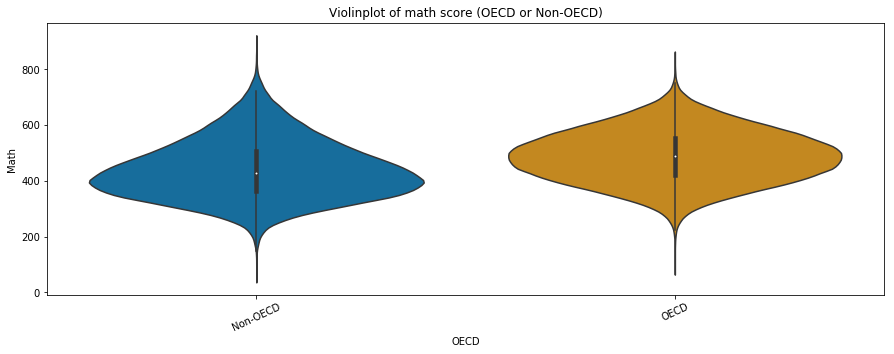

In [69]:
plt.figure(figsize = [15, 5])
group_means_OE = df.groupby(['OECD']).mean()
group_order = group_means_OE.sort_values(['Math'], ascending = False).index

ax = sb.violinplot(data=df, x= 'OECD', y='Math', palette='colorblind', col_order = group_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.title('Violinplot of math score (OECD or Non-OECD)')

In [35]:
df_2 = df.dropna()

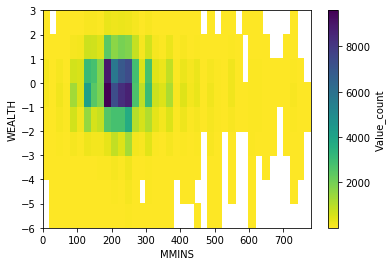

In [36]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

plt.hist2d(data = df_2, x = 'MMINS', y = 'WEALTH', cmap = 'viridis_r',
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Students count by Wealth and Learning Minutes')
plt.xlabel('MMINS')
plt.ylabel('WEALTH');
plt.colorbar(label = 'Value_count');

We can see wealth and learning minutes are moderately affecting to each scores by ploting 2d histgram of the scores by wealth and learning minutes as below.

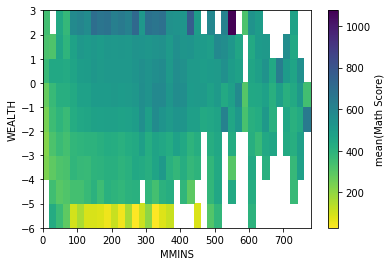

In [65]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['MMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'MMINS', columns = 'WEALTH').values

z_wts = df_2['Math'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'MMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Math Score by Wealth and Learning Minutes')
plt.xlabel('MMINS')
plt.ylabel('WEALTH');
plt.colorbar(label = 'mean(Math Score)');

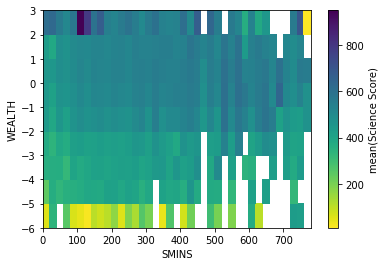

In [67]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['SMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'SMINS', columns = 'WEALTH').values

z_wts = df_2['Science'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'SMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Science Score by Wealth and Learning Minutes')
plt.xlabel('SMINS')
plt.ylabel('WEALTH');
plt.colorbar(label = 'mean(Science Score)');

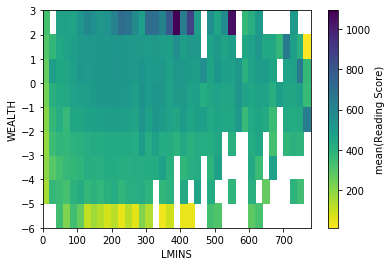

In [51]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-6, df_2['WEALTH'].max()+0.5, 1)

xbin_idxs = pd.cut(df_2['LMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'LMINS', columns = 'WEALTH').values

z_wts = df_2['Reading'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'LMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Reading Score by Wealth and Learning Minutes')
plt.xlabel('LMINS')
plt.ylabel('WEALTH');
plt.colorbar(label = 'mean(Reading Score)');

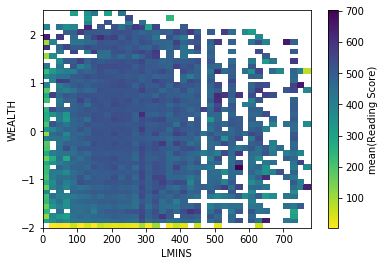

In [63]:
xbin_edges = np.arange(0, 800, 20)
ybin_edges = np.arange(-2.0, 2+0.6, 0.1)

xbin_idxs = pd.cut(df_2['LMINS'], xbin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)
ybin_idxs = pd.cut(df_2['WEALTH'], ybin_edges, right = False,
                    include_lowest = True, labels = False).fillna(0).astype(int)

pts_per_bin = df_2.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'LMINS', columns = 'WEALTH').values

z_wts = df_2['Reading'] / pts_per_bin[xbin_idxs, ybin_idxs]

plt.hist2d(data = df_2, x = 'LMINS', y = 'WEALTH', cmap = 'viridis_r', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmin = 0.5);
plt.title('Reading Score by Wealth and Learning Minutes')
plt.xlabel('LMINS')
plt.ylabel('WEALTH');
plt.colorbar(label = 'mean(Reading Score)');